# Série TP 5 - Partie 2 - Fouille de Données - Neural Nets with scikit-learn

Multi-layer Perceptron classifier in sklearn : **MLPClassifier** class. 

**Doc** : https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html 

**Parameters** : hidden_layer_sizes, activation, learning_rate, max_iter, etc.

**Methods** : fit(..), predict(..), score(..), get_params(..), etc.

**Attributes** : coefs_ , intercepts_ , loss_ , n_features_in_ , n_outputs_ , out_activation_ , n_layers_ , best_loss_ , validation_scores_ , etc.

**Steps:**
- Imports
- Loading the data
- Data pre-processing ans split (train/test data)
- MLPClassifier and Training (fit)
- Model Evaluation
- Hyper Parameter Tuning
- Predictions

## Imports

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

## Part 1 : Simple Dataset - Binary-Class Classification

### 1 - Data initialization, train and test :  2 inputs

In [2]:
X_train = [[0., 0.], 
     [0., 1.], 
     [1., 0.], 
     [1., 1.]
    ]

In [3]:
y_train = [0, 0, 0, 1]

In [4]:
X_test = [[0., 0.], [0., 1.], 
            [1., 0.], [0., 1.], 
            [1., 1.], [2., 2.],
            [1.3, 1.3], [2, 4.8]]

In [5]:
y_test = [0, 0, 0, 0, 1, 1, 1, 0]

### 2 - MLP Classifier initialization

In [6]:
#  NN Architecture : two input neurons, two hidden layers (5 neurons & 2 neurons), one output neuron

clf = MLPClassifier(hidden_layer_sizes=(5, 2), activation='logistic')

### 3 - Fitting and training the classifier on trainig data : X_train, y_train

In [7]:
# fit(X, y) : fit the model to data matrix X and target(s) y
# First weights and biases are initialized randomly by the classifier

clf.fit(X_train, y_train)

C:\Users\LeE\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(5, 2))

In [8]:
clf.get_params()

{'activation': 'logistic',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (5, 2),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

### Printing weight values : clf.coefs_

In [9]:
print("weights between input and first hidden layer:")
print(clf.coefs_[0])

weights between input and first hidden layer:
[[-0.57544991  0.20440453 -0.13440086 -0.50239013 -0.25424833]
 [-0.14004794 -0.30861146 -0.36297727 -0.10211616 -0.09284296]]


In [10]:
print("weights between first hidden and second hidden layer:")
print(clf.coefs_[1])

weights between first hidden and second hidden layer:
[[ 0.09393076 -0.01778045]
 [-0.33980872  0.10665626]
 [ 0.31259221 -0.59007297]
 [-0.28124685 -0.06528479]
 [ 0.06637641  0.17659905]]


In [11]:
print("weights between second hidden layer and output layer:")
print(clf.coefs_[2])

weights between second hidden layer and output layer:
[[-0.77139077]
 [ 0.25587592]]


In [12]:
# weight between first input and first neuron of first hidden layer
print("w0 = ", clf.coefs_[0][0][0])

w0 =  -0.5754499136482455


In [13]:
# weight between second input and first neuron of first hidden layer
print("w1 = ", clf.coefs_[0][1][0])

w1 =  -0.14004793760649636


### Printing bias values : clf.intercepts_

In [14]:
print("Bias values for first hidden layer:")
print(clf.intercepts_[0])

Bias values for first hidden layer:
[ 0.28940264 -0.65264219  0.0170473  -0.3183923  -0.44611223]


In [15]:
print("Bias values for second hidden layer:")
print(clf.intercepts_[1])

Bias values for second hidden layer:
[ 0.51635489 -0.67785538]


In [16]:
print("Bias values for output layer:")
print(clf.intercepts_[2])

Bias values for output layer:
[0.44247139]


### 4 - Model Evaluation : Mean accuracy scores on test data

In [17]:
# Case 1 : Test data = X_train, evaluation on training data

clf.score(X_train, y_train)

0.25

In [18]:
# Case 2 : Test data = X_test, evaluation on test data

clf.score(X_test, y_test)

0.375

In [19]:
# Second method to get accuracy scores

from sklearn.metrics import accuracy_score

y_preds = clf.predict(X_test)
accuracy_score(y_test, y_preds)

0.375

### 5 - Making predictions using trained MLP classifier

In [20]:
# Predict training data : X_train, y_train

clf.predict(X_train)

array([1, 1, 1, 1])

In [21]:
# Predict test data : test_X, test_y

clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1])

### 6 - Hyper parameter Tuning : Re train the model with other parameter values for better evaluation scores

Before - Warning : Maximum iterations (200) reached and the optimization hasn't converged yet. Logistic activation.

Hyper parameter tuning can be done automatically using approaches like **GridSearchCV**

In [22]:
clf_better = MLPClassifier(hidden_layer_sizes=(5, 2), activation='relu', max_iter=1000)

clf_better.fit(X_train, y_train)

clf_better.get_params()

C:\Users\LeE\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (5, 2),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [23]:
clf_better.score(X_train, y_train)

1.0

In [24]:
clf_better.score(X_test, y_test)

0.875

In [25]:
print(y_train)

clf_better.predict(X_train)

[0, 0, 0, 1]


array([0, 0, 0, 1])

In [26]:
print(y_test)

clf_better.predict(X_test)

[0, 0, 0, 0, 1, 1, 1, 0]


array([0, 0, 0, 0, 1, 1, 1, 1])

## 7 - Confusion Matrix for the trained clf_better MLP classifier

In [27]:
y_pred = clf_better.predict(X_test)

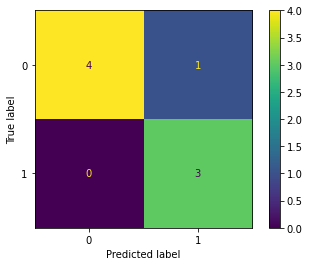

In [28]:
cm = confusion_matrix(y_test, y_pred, labels=clf_better.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_better.classes_)
disp.plot()
plt.show()

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.75      1.00      0.86         3

    accuracy                           0.88         8
   macro avg       0.88      0.90      0.87         8
weighted avg       0.91      0.88      0.88         8



## Part 2 : Iris Dataset - Multi-Class Classification

### 1 - Load dataset

In [30]:
df = pd.read_csv('Datasets/iris.csv')

df.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [31]:
df.shape

(150, 5)

In [32]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [33]:
df['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

### 2 - Data preprocessing and split

In [34]:
x = df.drop('variety', axis=1)
y = df['variety']

In [35]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [45]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
# Scaling the training data

scaler = StandardScaler()

scaler.fit(trainX)

trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

### 3 - MLP Classifier

In [37]:
clf_iris = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

clf_iris.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (150, 100, 50),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 300,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

### 4 - Training the MLP classifier 

In [38]:
clf_iris.fit(trainX_scaled, trainY)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

### 5 - Model Evaluation

In [40]:
predY = clf_iris.predict(testX_scaled)

accuracy_score(testY, predY)

0.9666666666666667

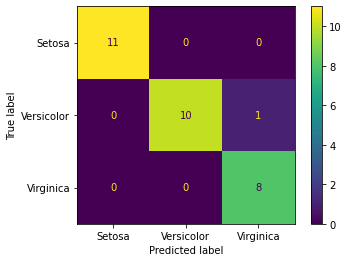

In [42]:
cm = confusion_matrix(testY, predY, labels=clf_iris.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_iris.classes_)
disp.plot()
plt.show()

In [43]:
print(classification_report(testY, predY))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      0.91      0.95        11
   Virginica       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### 6 - Making predictions

In [44]:
clf_iris.predict(testX_scaled)

array(['Virginica', 'Virginica', 'Virginica', 'Setosa', 'Versicolor',
       'Versicolor', 'Versicolor', 'Setosa', 'Versicolor', 'Virginica',
       'Setosa', 'Versicolor', 'Virginica', 'Virginica', 'Virginica',
       'Setosa', 'Setosa', 'Versicolor', 'Setosa', 'Setosa', 'Versicolor',
       'Versicolor', 'Setosa', 'Versicolor', 'Setosa', 'Versicolor',
       'Virginica', 'Setosa', 'Virginica', 'Setosa'], dtype='<U10')